# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.colors as mcolors

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | siemiatycze
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | puerto leguizamo
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | dubbo
Processing Record 8 of Set 1 | utrik
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | farsan
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | qo'qon
City not found. Skipping...
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | fraserburgh
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | petra
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 |

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,siemiatycze,52.4272,22.8623,282.42,97,100,0.87,PL,1698248729
1,port-aux-francais,-49.3500,70.2167,277.74,87,100,7.69,TF,1698248729
2,lihue,21.9789,-159.3672,295.73,88,0,3.60,US,1698248730
3,puerto leguizamo,-0.1934,-74.7819,307.82,45,100,0.81,CO,1698248731
4,hawaiian paradise park,19.5933,-154.9731,296.50,92,100,2.06,US,1698248551


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [62]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,siemiatycze,52.4272,22.8623,282.42,97,100,0.87,PL,1698248729
1,port-aux-francais,-49.3500,70.2167,277.74,87,100,7.69,TF,1698248729
2,lihue,21.9789,-159.3672,295.73,88,0,3.60,US,1698248730
3,puerto leguizamo,-0.1934,-74.7819,307.82,45,100,0.81,CO,1698248731
4,hawaiian paradise park,19.5933,-154.9731,296.50,92,100,2.06,US,1698248551


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

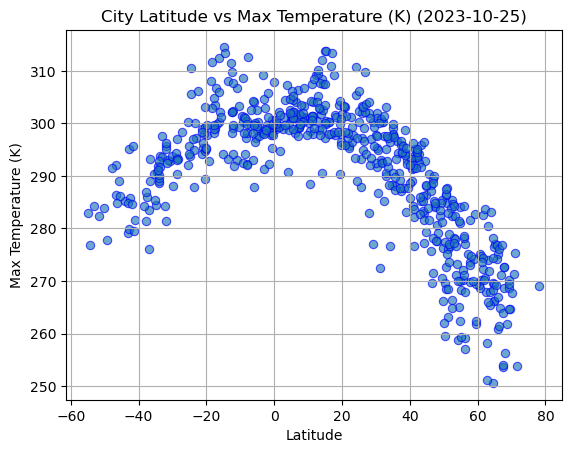

In [106]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,alpha=0.65,edgecolors="b",linewidths=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (K) (2023-10-25)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1H.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

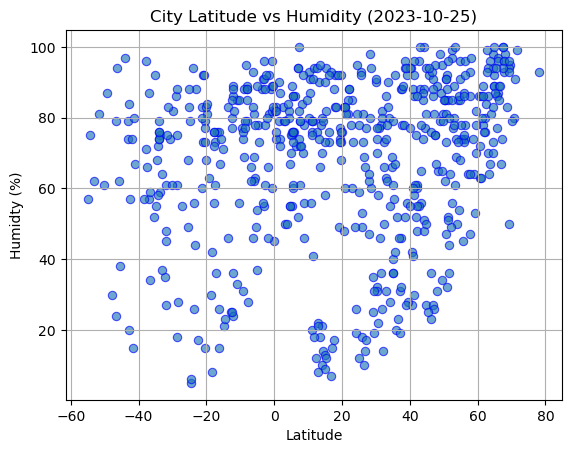

In [109]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,alpha=0.65,edgecolors="b",linewidths=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-10-25)")
plt.xlabel("Latitude")
plt.ylabel("Humidty (%)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2H.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

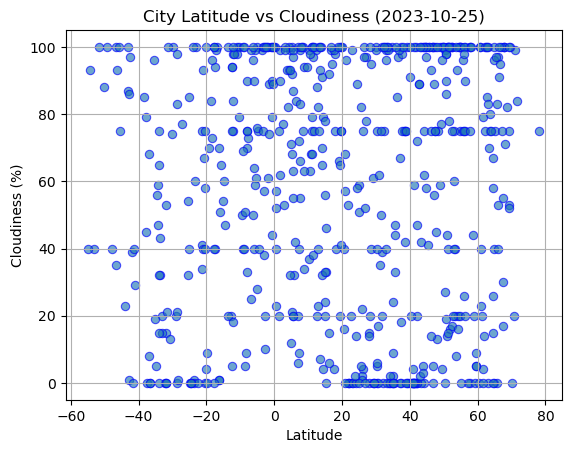

In [107]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,alpha=0.65,edgecolors="b",linewidths=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-10-25)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3H.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

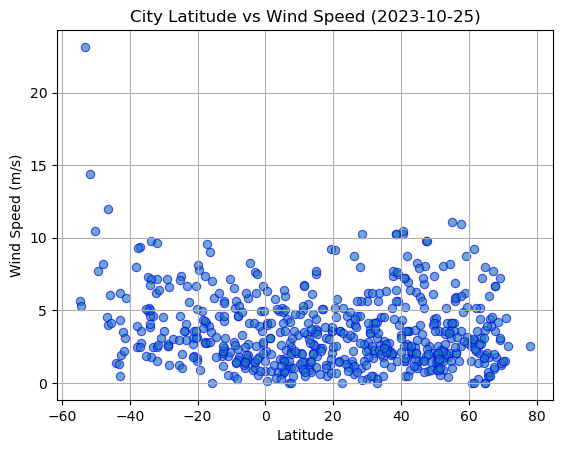

In [111]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,alpha=0.65,edgecolors="b",linewidths=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-10-25)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4H.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [304]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values,text_coord, x):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values,facecolors="blue", edgecolors="black", alpha = 0.55)
    plt.annotate(line_eq,text_coord, fontsize = 12, color="red")
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(x)
    plt.grid()

    plt.show()
    print(f"The r-value is: {round(st.pearsonr(x_values,y_values)[0],2)}")


In [305]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,siemiatycze,52.4272,22.8623,282.42,97,100,0.87,PL,1698248729
2,lihue,21.9789,-159.3672,295.73,88,0,3.60,US,1698248730
4,hawaiian paradise park,19.5933,-154.9731,296.50,92,100,2.06,US,1698248551
5,olonkinbyen,70.9221,-8.7187,275.30,91,99,4.47,SJ,1698248732
7,utrik,11.2278,169.8474,300.52,76,75,5.01,MH,1698248592


In [306]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,277.74,87,100,7.69,TF,1698248729
3,puerto leguizamo,-0.1934,-74.7819,307.82,45,100,0.81,CO,1698248731
6,dubbo,-32.2500,148.6167,284.22,35,0,6.17,AU,1698248732
12,fale old settlement,-9.3852,-171.2468,301.42,77,50,6.57,TK,1698248736
16,port lincoln,-34.7333,135.8667,284.51,55,5,7.30,AU,1698248739


###  Temperature vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

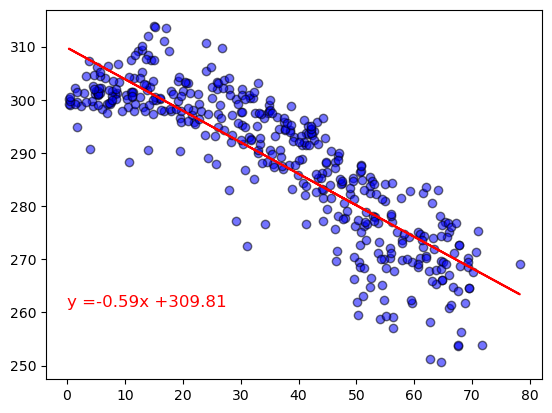

In [308]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (0,261), 'Latitude')

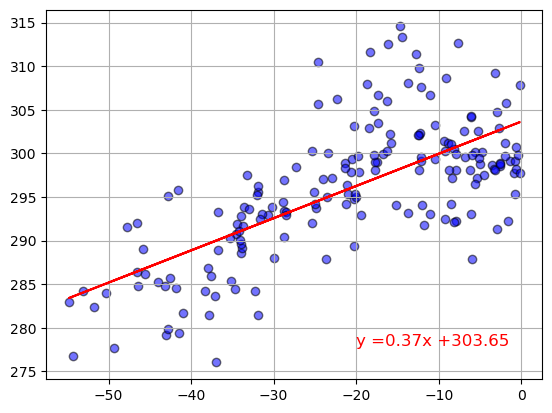

The r-value is: 0.68


In [266]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-20,278))

**Discussion about the linear relationship:** 
- As plotted in the graphs above, we can observe a clear pattern where we can recognize that the temperature in cities closer to the equator are noticeably higher than those cities far from the equator. 
- We can also observe that the highest temperatures registered in our data occurr at a latitude between 10 and 20, and between -10 and -20.

### Humidity vs. Latitude Linear Regression Plot

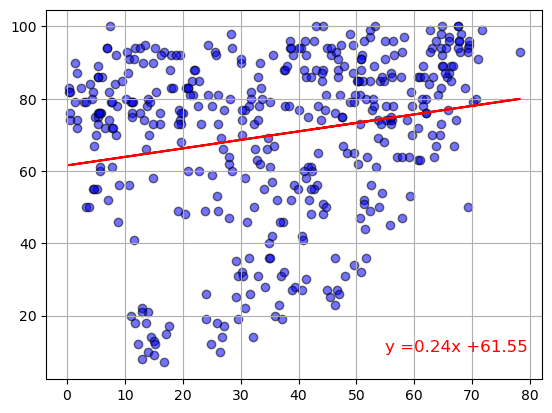

The r-value is: 0.2


In [267]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (55,10))

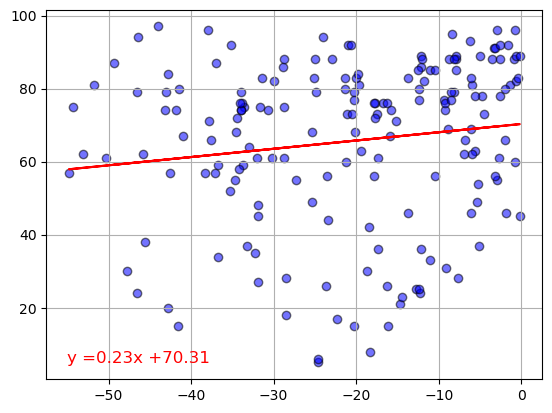

The r-value is: 0.14


In [268]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55,5))

**Discussion about the linear relationship:** 
- As we can observe in the graphs plotted above, there does not seem to be a direct relationship between latitude and humidity levels. The humidity points are scattered all throughout the latitudes. It might be safe to assume that latitude does not affect humidity levels.
- Another observation we can make from the graphs is that the majority of the cities randomly selected for this analysis have a 60% or more level of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

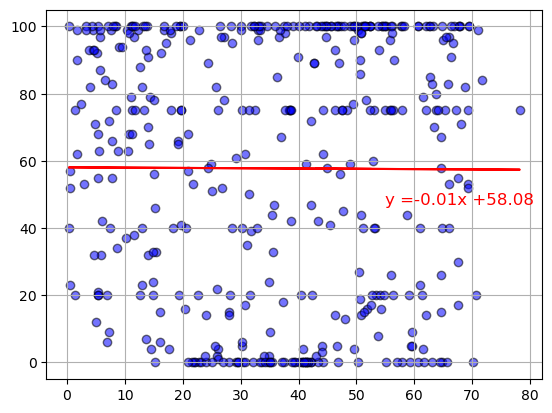

The r-value is: -0.0


In [269]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (55,47))

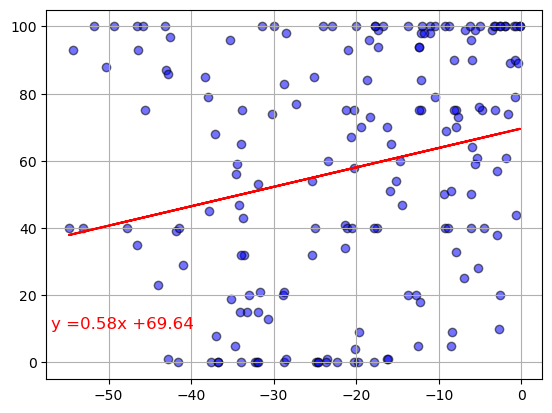

The r-value is: 0.23


In [270]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-57,10))

**Discussion about the linear relationship:** 
- In the graph above we are analyzing the cloudiness levels on cities based on their latitude. When comparing the northern hemisphere to the southern hemispheres, we can observe there seems to be no correlation between the cloudiness and the latitude levels. The cloudiness levels seem to be pretty balanced all across. 

### Wind Speed vs. Latitude Linear Regression Plot

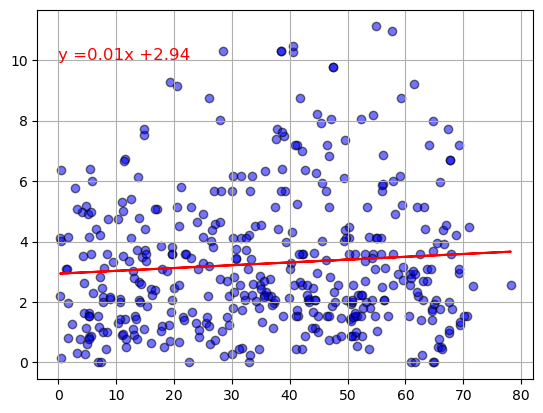

The r-value is: 0.08


In [271]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (0,10))

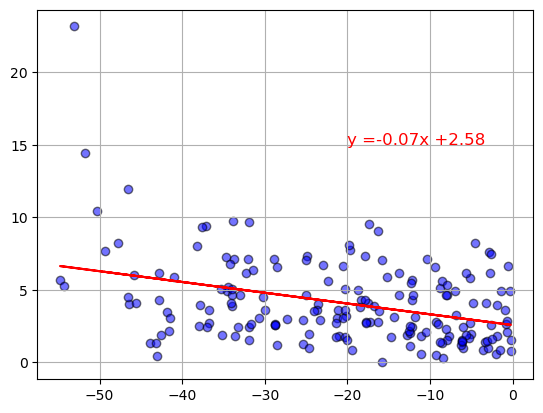

The r-value is: -0.37


In [272]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-20,15))

**Discussion about the linear relationship:** 
- As we can observe in the graphs plotted above, it appears that wind speeds on the northern hemisphere seem to be similar to the winds presented to us in the data of the southern hemisphere. 